## HOG features

In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2

## Reading images using OpenCV

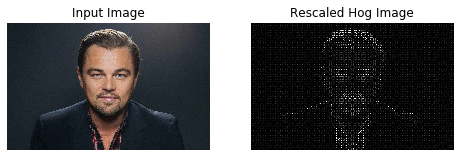

In [2]:
image = cv2.imread('leo_cap.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#SIngle channel hog uses cv2.COLOR_BGR2GRAY
# Feature descriptor and the gradients (hog) is shown
fd, hog_image=hog(image, orientations=8, pixels_per_cell=(16,16),
                 cells_per_block=(1,1), visualize=True, multichannel=True)

# plot input and hog image
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

# Rescaling histogram for better display
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Rescaled Hog Image')
plt.show()

In [3]:
len(fd)

72000

In [4]:
image.shape

(1201, 1920, 3)

In [5]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

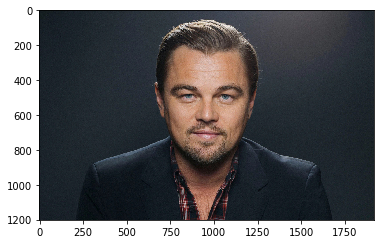

In [6]:
image=cv2.imread('leo_cap.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
face_locations=face_recognition.face_locations(image)
#Uses sliding window classifier

number_of_faces=len(face_locations)
print('Found {} face(s) in input image' .format(number_of_faces))

Found 1 face(s) in input image


A face is located at pixel location Top: 707, left: 348, Bottom: 1170, Right:811


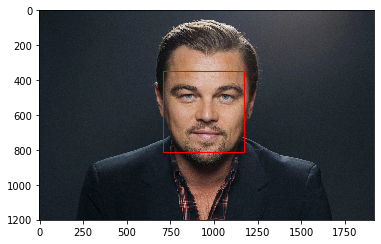

In [8]:
#Adding rectangle to recognizing faces
plt.imshow(image)
ax=plt.gca()

#repeat for all faces found
for face_location in face_locations:
    #Print the location of each face in the image
    top,right,bottom, left=face_location
    x,y,w,h=left, top, right, bottom
    print('A face is located at pixel location Top: {}, left: {}, Bottom: {}, Right:{}' .format(x,y,w,h))
    
    #adding rectangle as a box around the face
    rect=Rectangle((x,y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
    
#plotting the output
plt.show()

Found 2 face(s) in input image
A face is located at pixel location Top: 38, left: 47, Bottom: 113, Right:121
A face is located at pixel location Top: 145, left: 36, Bottom: 235, Right:126


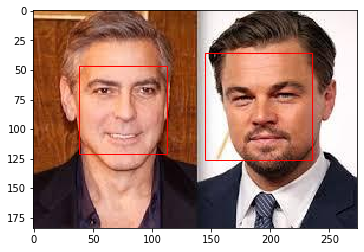

In [9]:
image=cv2.imread('images.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
face_locations=face_recognition.face_locations(image)
#Uses sliding window classifier

number_of_faces=len(face_locations)
print('Found {} face(s) in input image' .format(number_of_faces))
#Adding rectangle to recognizing faces
plt.imshow(image)
ax=plt.gca()

#repeat for all faces found
for face_location in face_locations:
    #Print the location of each face in the image
    top,right,bottom, left=face_location
    x,y,w,h=left, top, right, bottom
    print('A face is located at pixel location Top: {}, left: {}, Bottom: {}, Right:{}' .format(x,y,w,h))
    
    #adding rectangle as a box around the face
    rect=Rectangle((x,y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
    
#plotting the output
plt.show()

## Face Recognition
lOcate and extract the faces (face detection)

Represent the face as features - encoding and decoding (Autoencoders) - if decoder can construct the embedding / encoding

Compare with known faces - present in the created database - then create the encoding and use the test image afterwards and compare the encodings

Compute euclidean distance and apply threshold (distance rule) - 0.6 is the arbitrary limit

In [10]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [11]:
image=cv2.imread('idris.jpg')
face_idris=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread('test.jpg')
clooney=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread('leo_cap.jpg')
leonardo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
#creating face encodings
#taking the first element of the output list
face_idris_encoding=face_recognition.face_encodings(face_idris)[0]
clooney_encoding=face_recognition.face_encodings(clooney)[0]
leonardo_encoding=face_recognition.face_encodings(leonardo)[0]

# CReating the database as list
known_face_encodings=[
    face_idris_encoding,
    clooney_encoding,
    leonardo_encoding
]

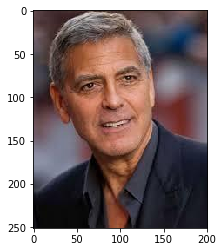

In [13]:
image=cv2.imread('clo2.jpg')
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#Encoding the unkown image
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [14]:
#Scipy used to compute distance
from scipy.spatial import distance
   
#run for loop for all the encodings found in the unkonw image
for unknown_face_encoding in unknown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold=0.6
    results=np.array(results)<=threshold
    
    name='Unknown'
    
    if results[0]:
        name='Idris'
    elif results[1]:
        name='George Clooney'
    elif results[2]:
        name='Leonardo DiCaprio'
    
    print(f"found {name} in the photo!")

found George Clooney in the photo!


## Identifying facial landmarks
- 68 point face landmark model
- eyes nose chin, nose tip
- used for modifying images
- used for improving accuracy - aligning the face towards the front
- returns chin structure, left eye-brow, right-eyebrow, nose-bridge, nose-tip,
left-eye, right-eye, top-lip, bottom-lip

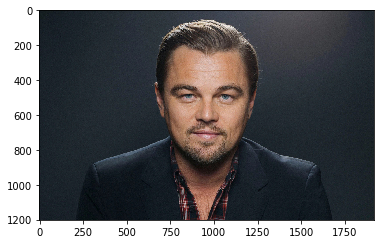

In [15]:
# reading leonardo dicaprio
image=cv2.imread('leo_cap.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [19]:
face_landmarks_list=face_recognition.face_landmarks(image)
print(face_landmarks_list)

[{'chin': [(712, 474), (715, 541), (721, 608), (733, 674), (757, 737), (798, 789), (848, 833), (901, 870), (959, 884), (1016, 872), (1069, 838), (1119, 797), (1161, 747), (1186, 686), (1197, 620), (1204, 552), (1209, 483)], 'left_eyebrow': [(753, 471), (781, 434), (829, 421), (878, 432), (923, 455)], 'right_eyebrow': [(1010, 454), (1055, 433), (1103, 425), (1150, 440), (1174, 477)], 'nose_bridge': [(967, 498), (965, 535), (964, 572), (962, 611)], 'nose_tip': [(913, 633), (937, 642), (962, 649), (987, 644), (1009, 638)], 'left_eye': [(819, 494), (846, 482), (877, 483), (903, 501), (875, 506), (843, 505)], 'right_eye': [(1025, 506), (1054, 487), (1085, 488), (1111, 501), (1087, 512), (1055, 512)], 'top_lip': [(872, 704), (907, 694), (939, 688), (959, 695), (981, 692), (1013, 702), (1051, 713), (1035, 713), (981, 711), (958, 711), (937, 707), (885, 705)], 'bottom_lip': [(1051, 713), (1012, 737), (980, 745), (956, 745), (934, 742), (905, 730), (872, 704), (885, 705), (936, 709), (957, 713)

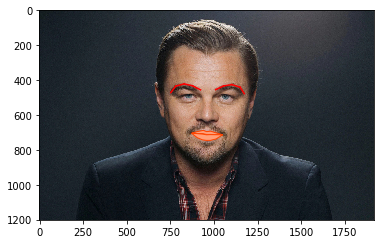

In [18]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()

#Run forloop for all the faces in the facial landmarks list
for face_landmarks in face_landmarks_list:
    left_eyebrow_pts=face_landmarks['left_eyebrow']
    pre_x, pre_y=left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x], [pre_y,y], color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y
    
    right_eyebrow_pts=face_landmarks['right_eyebrow']
    pre_x, pre_y=right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x], [pre_y,y], color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y
    
    p=Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p=Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    
plt.show()